In [1]:
import pandas as pd
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import warnings

In [2]:
#Преднастройки для графиков
px.defaults.template = "ggplot2"
px.defaults.color_continuous_scale = px.colors.sequential.Oryel
warnings.filterwarnings('ignore')

Загружаем данные

In [3]:
df = pd.read_csv('./DataEngineer.csv')

In [4]:
df.head()

Job Title  \
0                                      Data Engineer   
1  Senior Data Engineer (Healthcare Domain experi...   
2                                     Data Engineers   
3                      Client Trade Support Engineer   
4                                      Data Engineer   

               Salary Estimate  \
0  $80K-$150K (Glassdoor est.)   
1  $80K-$150K (Glassdoor est.)   
2  $80K-$150K (Glassdoor est.)   
3  $80K-$150K (Glassdoor est.)   
4  $80K-$150K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Company Description\nSagence is a management a...     4.5   
1  Key Responsibilities\n\n- Architect, build, an...     3.4   
2  Overview\n\nJob description\n\nPosition Overvi...     5.0   
3  About the Position\n\n\nThis position will sup...     4.8   
4  Data Engineer\n\nJob Details\nLevel\nExperienc...     3.7   

                   Company Name      Location      Headquarters  \
0                  Sagence\n4.5  New York, NY       Chicago, IL   
1   Enterprise Integration\n3.4  New York, NY  Jacksonville, FL   
2     Maestro Technologies\n5.0  New York, NY       Trenton, NJ   
3              Jane Street\n4.8  New York, NY      New York, NY   
4  GNY Insurance Companies\n3.7  New York, NY      New York, NY   

                    Size  Founded  Type of ownership  \
0      1 to 50 employees     2009  Company - Private   
1    51 to 200 employees     1998  Company - Private   
2    51 to 200 employees     2003  Company - Private   
3  501 to 1000 employees     2000  Company - Private   
4   201 to 500 employees     1914  Company - Private   

                                Industry                  Sector  \
0                             Consulting       Business Services   
1                            IT Services  Information Technology   
2                            IT Services  Information Technology   
3  Investment Banking & Asset Management                 Finance   
4                     Insurance Carriers               Insurance   

                      Revenue                       Competitors Easy Apply  
0    $10 to $25 million (USD)               WCI Consulting, PwC         -1  
1    $25 to $50 million (USD)                                -1         -1  
2     $5 to $10 million (USD)                                -1         -1  
3    Unknown / Non-Applicable                                -1         -1  
4  $100 to $500 million (USD)  Travelers, Chubb, Crum & Forster       True

В Company Name еще и rating оказался задублированным. Удаляем его

In [5]:
def get_name(name):
    return name.split('\n')[0]

In [6]:
df['c_name'] = df['Company Name'].apply(get_name)

Построить график компаний с самым большим кол-вом вакансий

In [7]:
# Берем 10 с наибольшим числом вакансий
tmp = df['c_name'].value_counts()[:10].reset_index()

In [8]:
tmp.columns = ['Company Name', 'Total']

In [9]:
fig = px.bar(tmp, 
             x='Company Name',
             y='Total',
             hover_name='Company Name',
             title='Топ 10 компаний с наибольшим числом вакансий',
             color='Total',
             text_auto=True
            )
fig.show()

Построить график самых популярный названий в вакансиях<br>
Оставим только названия, встречающиеся больше 2 раз

In [10]:
common_names = ' '.join(df['Job Title'].value_counts() \
    .where(lambda x: x > 2) \
    .dropna() \
    .index)

In [11]:
cloud = WordCloud(width = 1200, height = 800,
                background_color ='white',
                min_font_size = 10).generate(common_names)

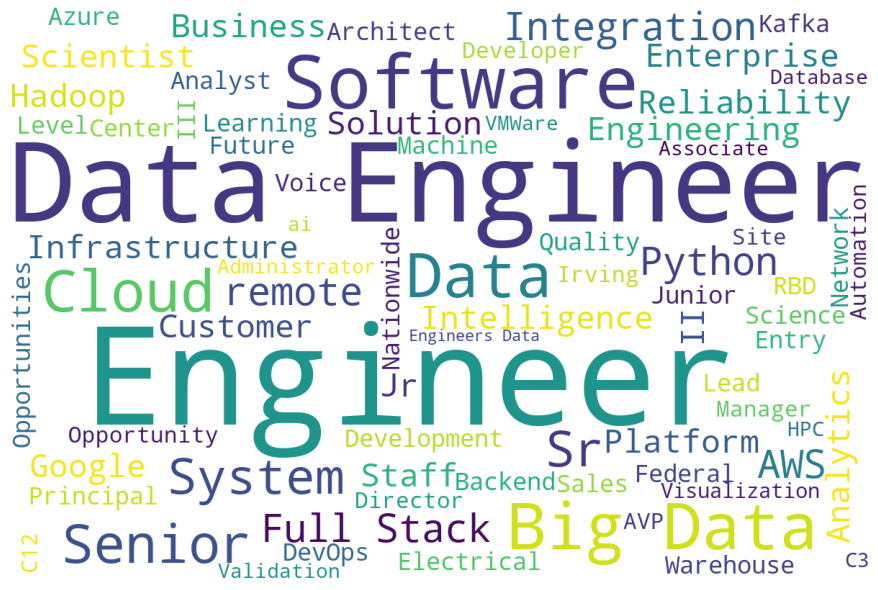

In [12]:
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

Построить график самых популярных местоположений вакансий по их численности и построить круговую диаграмму


In [13]:
df['Location'].nunique()

113

Данных слишком много для круговой диаграммы, пробуем уменьшить

In [14]:
df['Region'] = df['Location'].apply(lambda x: x.split(', ')[1])
print(df['Region'].nunique())

9


In [15]:
regions = df.groupby(by='Region', as_index=False)['Location'].count()

In [16]:
fig = px.pie(data_frame=regions,
            names='Region',
            values='Location',
            title='Самые популярные местоположения вакансий')
fig.show()

Построить график популярности по колонке Type of ownership, относительно численности вакансий

Не совсем понял, что нужно сделать в этой задаче, строю bar chart'ы по кол-ву вакансий

In [17]:
df['Type of ownership'].unique()

array(['Company - Private', 'Company - Public', 'Nonprofit Organization',
       'College / University', 'Subsidiary or Business Segment',
       'Hospital', 'Contract', '-1', 'Unknown', 'Government',
       'Self-employed', 'Private Practice / Firm', 'Other Organization',
       'School / School District'], dtype=object)

In [18]:
#Заменим -1 на Unknown
df.loc[df['Type of ownership']=='-1', 'Type of ownership'] = 'Unknown'

In [19]:
df_too = df.groupby(by='Type of ownership', as_index=False)['Job Title'].count()

In [20]:
df_too.rename(columns={'Job Title':'Total'}, inplace=True)

In [21]:
df_too.sort_values(by='Total', ascending=False, inplace=True)

In [22]:
fig = px.bar(df_too, 
             x='Type of ownership',
             y='Total',
             hover_name='Type of ownership',
             color='Total',
             text_auto=True
            )
fig.show()

Построить график популярности по секторам работы

Аналогично, заменяем -1 на Unknown

In [23]:
df.loc[df['Sector']=='-1', 'Sector'] = 'Unknown'

Оставим тех, кто больше 20

In [24]:
df['Sector'].value_counts()

Information Technology                890
Business Services                     416
Unknown                               375
Finance                               177
Aerospace & Defense                    94
Manufacturing                          93
Insurance                              82
Media                                  52
Health Care                            51
Oil, Gas, Energy & Utilities           37
Retail                                 36
Biotech & Pharmaceuticals              35
Telecommunications                     32
Education                              28
Accounting & Legal                     27
Government                             24
Transportation & Logistics             24
Real Estate                            16
Consumer Services                      13
Restaurants, Bars & Food Services       7
Construction, Repair & Maintenance      7
Arts, Entertainment & Recreation        5
Travel & Tourism                        4
Non-Profit                        

In [25]:
top_sector = df['Sector'].value_counts().where(lambda x: x > 20).dropna().index
print(top_sector)

Index(['Information Technology', 'Business Services', 'Unknown', 'Finance',
       'Aerospace & Defense', 'Manufacturing', 'Insurance', 'Media',
       'Health Care', 'Oil, Gas, Energy & Utilities', 'Retail',
       'Biotech & Pharmaceuticals', 'Telecommunications', 'Education',
       'Accounting & Legal', 'Government', 'Transportation & Logistics'],
      dtype='object')


In [26]:
sector = df[df['Sector'].isin(top_sector)].groupby(by='Sector', as_index=False)['Job Title'].count()

In [27]:
sector.rename(columns={'Job Title':'Total'}, inplace=True)

In [28]:
sector.sort_values(by='Total', ascending=False, inplace=True)

In [29]:
fig = px.bar(data_frame=sector,
            x='Sector',
            y='Total',
            title='Топ компаний по секторам',
            color='Total')
fig.show()

Построить график используя сектора работы и средний уровень зарплат в них

In [30]:
df.head()

Job Title  \
0                                      Data Engineer   
1  Senior Data Engineer (Healthcare Domain experi...   
2                                     Data Engineers   
3                      Client Trade Support Engineer   
4                                      Data Engineer   

               Salary Estimate  \
0  $80K-$150K (Glassdoor est.)   
1  $80K-$150K (Glassdoor est.)   
2  $80K-$150K (Glassdoor est.)   
3  $80K-$150K (Glassdoor est.)   
4  $80K-$150K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Company Description\nSagence is a management a...     4.5   
1  Key Responsibilities\n\n- Architect, build, an...     3.4   
2  Overview\n\nJob description\n\nPosition Overvi...     5.0   
3  About the Position\n\n\nThis position will sup...     4.8   
4  Data Engineer\n\nJob Details\nLevel\nExperienc...     3.7   

                   Company Name      Location      Headquarters  \
0                  Sagence\n4.5  New York, NY       Chicago, IL   
1   Enterprise Integration\n3.4  New York, NY  Jacksonville, FL   
2     Maestro Technologies\n5.0  New York, NY       Trenton, NJ   
3              Jane Street\n4.8  New York, NY      New York, NY   
4  GNY Insurance Companies\n3.7  New York, NY      New York, NY   

                    Size  Founded  Type of ownership  \
0      1 to 50 employees     2009  Company - Private   
1    51 to 200 employees     1998  Company - Private   
2    51 to 200 employees     2003  Company - Private   
3  501 to 1000 employees     2000  Company - Private   
4   201 to 500 employees     1914  Company - Private   

                                Industry                  Sector  \
0                             Consulting       Business Services   
1                            IT Services  Information Technology   
2                            IT Services  Information Technology   
3  Investment Banking & Asset Management                 Finance   
4                     Insurance Carriers               Insurance   

                      Revenue                       Competitors Easy Apply  \
0    $10 to $25 million (USD)               WCI Consulting, PwC         -1   
1    $25 to $50 million (USD)                                -1         -1   
2     $5 to $10 million (USD)                                -1         -1   
3    Unknown / Non-Applicable                                -1         -1   
4  $100 to $500 million (USD)  Travelers, Chubb, Crum & Forster       True   

                    c_name Region  
0                  Sagence     NY  
1   Enterprise Integration     NY  
2     Maestro Technologies     NY  
3              Jane Street     NY  
4  GNY Insurance Companies     NY

In [31]:
df['Salary Estimate'].unique()

array(['$80K-$150K (Glassdoor est.)', '$73K-$94K (Glassdoor est.)',
       '$85K-$154K (Glassdoor est.)', '$84K-$113K (Glassdoor est.)',
       '$57K-$75K (Glassdoor est.)', '$105K-$121K (Glassdoor est.)',
       '$92K-$117K (Glassdoor est.)', '$88K-$136K (Glassdoor est.)',
       '$95K-$167K (Glassdoor est.)', '$79K-$146K (Glassdoor est.)',
       '$93K-$106K (Glassdoor est.)', '$115K-$201K (Glassdoor est.)',
       '$94K-$164K (Glassdoor est.)', '$49K-$98K (Glassdoor est.)',
       '$56K-$108K (Glassdoor est.)', '$85K-$158K (Glassdoor est.)',
       '$133K-$210K (Glassdoor est.)', '$95K-$99K (Glassdoor est.)',
       '$67K-$72K (Glassdoor est.)', '$53K-$100K (Glassdoor est.)',
       '$81K-$100K (Glassdoor est.)', '$94K-$107K (Glassdoor est.)',
       '$43K-$84K (Glassdoor est.)', '$62K-$92K (Glassdoor est.)',
       '$55K-$106K (Glassdoor est.)', '$69K-$103K (Glassdoor est.)',
       '$54K-$113K (Glassdoor est.)', '$74K-$123K (Glassdoor est.)',
       '$69K-$122K (Glassdoor est.)', 

In [32]:
def get_salary(estimated_salary):
    low = int(''.join([i for i in estimated_salary.split('-')[0] if i.isdigit()]))*1000
    high = int(''.join([i for i in estimated_salary.split('-')[1].split(' ')[0] if i.isdigit()]))*1000
    return (low + high) / 2

In [33]:
df['Salary'] = df['Salary Estimate'].apply(get_salary)

In [34]:
sector_avg_salary = df[df['Sector'].isin(top_sector)].groupby(by='Sector', as_index=False)['Salary'].mean()

In [35]:
sector_avg_salary.sort_values(by='Salary', ascending=False, inplace=True)

In [36]:
fig = px.bar(data_frame=sector_avg_salary,
            x='Sector',
            y='Salary',
            title='Ср зп по секторам',
            color='Salary')
fig.show()

Построить гистограмму распределения рейтинга компаний

In [37]:
fig = px.histogram(df.loc[df['Rating'] != -1],
                  x='Rating',
                  title='Гистограмма распределения рейтинга компаний')
fig.show()

Построить график средних зарплат по популярным компаниям

In [38]:
top_company_avg_sal = df[df['c_name'].isin(tmp['Company Name'])].groupby(by='c_name', as_index=False)['Salary'].mean()

In [39]:
top_company_avg_sal.rename(columns={'c_name':'Company Name'}, inplace=True)

In [40]:
top_company_avg_sal

Company Name         Salary
0                      Amazon  104321.428571
1                       Apple  124444.444444
2             Bell Helicopter   82666.666667
3                Diverse Lynx   84733.333333
4                      Google  106000.000000
5                      Humana   75218.750000
6                   IntraEdge   93125.000000
7             Lockheed Martin   90583.333333
8                        MUFG   99153.846154
9  Management Decisions, Inc.  124857.142857

In [41]:
fig = px.bar(top_company_avg_sal,
            x='Company Name',
            y='Salary',
            title='Средние зарплаты в популярных компаниях')
fig.show()

Построить по описанию вакансий облако тегов, исследовать самые популярные слова

In [42]:
job_description = list(df['Job Description'])

In [43]:
job_text = []
for description in job_description:
    job_text.extend(description.split(' '))
job_text = ' '.join(job_text)

In [44]:
cloud = WordCloud(width = 1200, height = 800,
                background_color ='white',
                min_font_size = 10,
                stopwords=STOPWORDS).generate(job_text)

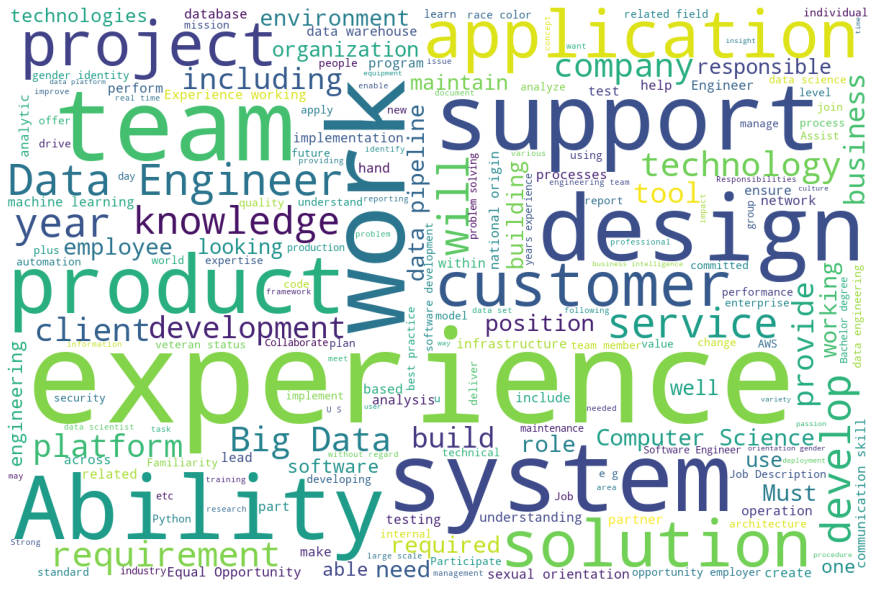

In [45]:
plt.figure(figsize = (12, 8), facecolor = None)
plt.imshow(cloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()